In [ ]:
#As per the module first import the required libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#upload the file to the colab
#import the data to colab environment
cyclone_distrubance=pd.read_csv("cyclone.csv")
cyclone_distrubance.head()#here it shows the first five rows of the data
cyclone_distrubance.tail()#here it shows the last five rows of the data
# AS the data imported correctly we can proceed to next steps
#Do the data preprocessing task clean the data
#check whethere there are any missing values in the data
cyclone_distrubance.info()#check the total information on the dataset
cyclone_distrubance.isnull().sum()#check the null values in the dataset
cyclone_distrubance.shape #check how many row and columns in the dataset
cyclone_distrubance.describe()#check the statistics like mean,min,max,count,std in the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Year                           129 non-null    int64
 1   Cyclonic Disturbances - BOB    129 non-null    int64
 2   Cyclonic Disturbances - AS     129 non-null    int64
 3   Cyclonic Disturbances - LAND   129 non-null    int64
 4   Cyclonic Disturbances - TOTAL  129 non-null    int64
 5   Cyclones - BOB                 129 non-null    int64
 6   Cyclones - AS                  129 non-null    int64
 7   Cyclones - LAND                129 non-null    int64
 8   Cyclones - TOTAL               129 non-null    int64
 9   Severe Cyclones - BOB          129 non-null    int64
 10  Severe Cyclones - AS           129 non-null    int64
 11  Severe Cyclones - LAND         129 non-null    int64
 12  Severe Cyclones - TOTAL        129 non-null    int64
dtypes: int64(13)
memory 

,Year,Cyclonic Disturbances - BOB,Cyclonic Disturbances - AS,Cyclonic Disturbances - LAND,Cyclonic Disturbances - TOTAL,Cyclones - BOB,Cyclones - AS,Cyclones - LAND,Cyclones - TOTAL,Severe Cyclones - BOB,Severe Cyclones - AS,Severe Cyclones - LAND,Severe Cyclones - TOTAL
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1955.000000,9.426357,1.790698,1.093023,12.310078,4.031008,1.023256,0.108527,5.162791,1.813953,0.620155,0.031008,2.465116
std,37.383151,3.230168,1.529269,1.056541,3.667421,1.802507,1.093054,0.358824,1.939679,1.303645,0.911676,0.174014,1.649084
min,1891.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1923.000000,7.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000
50%,1955.000000,9.000000,1.000000,1.000000,12.000000,4.000000,1.000000,0.000000,5.000000,2.000000,0.000000,0.000000,2.000000
75%,1987.000000,12.000000,3.000000,2.000000,15.000000,5.000000,2.000000,0.000000,6.000000,3.000000,1.000000,0.000000,4.000000
max,2019.000000,16.000000,8.000000,4.000000,20.000000,9.000000,5.000000,2.000000,10.000000,6.000000,5.000000,1.000000,7.000000


In [ ]:
#Take the relevant column i.e cyclonic disturbances total column
cyclone_distrubance_total=cyclone_distrubance['Cyclonic Disturbances - TOTAL']
cyclone_distrubance_total
#now calculate the mean and standard deviation for cyclone_distrubance_total
cyclone_sample=cyclone_distrubance_total.sample(n=35,random_state=42)
cyclone_sample_mean=cyclone_sample.mean()
cyclone_sample_std=cyclone_sample.std()
n=len(cyclone_sample)
print(n)
print(f"{cyclone_sample_mean=}")
print(f"{cyclone_sample_std=}")
#Assume the historical mean i.e here historical mean means population mean only
historical_mean=cyclone_distrubance_total.mean()
print(f"{historical_mean=}")
#calculate population std
population_std=cyclone_distrubance_total.std(ddof=0)
print(f"{population_std=}")
#calculate z statistics
z_score=(cyclone_sample_mean-historical_mean)/(population_std/np.sqrt(n))
print(f"{z_score=}")
#compare the z_score with critical value
#as Z_critical value given i.e
z_critical=1.645
alpha=0.05
#test the hypothesis
if z_score>z_critical:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")


35
cyclone_sample_mean=np.float64(12.371428571428572)
cyclone_sample_std=3.8431429714700522
historical_mean=np.float64(12.310077519379846)
population_std=3.6531783965598406
z_score=np.float64(0.09935395409081467)
Accept the null hypothesis


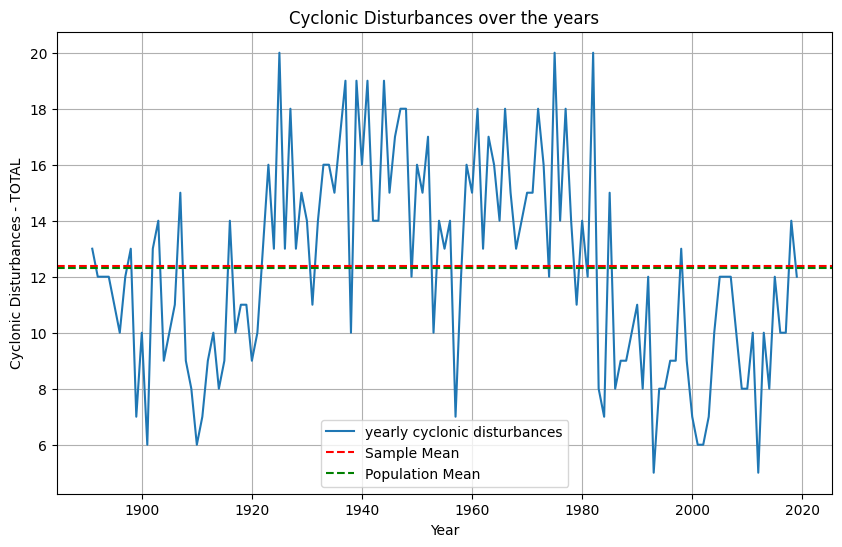

In [ ]:
# i.e graphical visualization
#fix the size of the graph
plt.figure(figsize=(10,6))
#use the line plot because as it shows trends over time
sns.lineplot(x=cyclone_distrubance['Year'],y=cyclone_distrubance['Cyclonic Disturbances - TOTAL'],label='yearly cyclonic disturbances')
#Draw the horizontal dashed red line for sample mean
plt.axhline(y=cyclone_sample_mean,color='red',linestyle='--',label='Sample Mean')
#draw the horizontal green line for population mean
plt.axhline(y=historical_mean,color='green',linestyle='--',label='Population Mean')
#give the title name
plt.title('Cyclonic Disturbances over the years')
#indicate the x-axis
plt.xlabel('Year')
#indicate the y axis
plt.ylabel('Cyclonic Disturbances - TOTAL')
#use legend to identify the each line
plt.legend()
plt.grid(True)
#show the graph
plt.show()

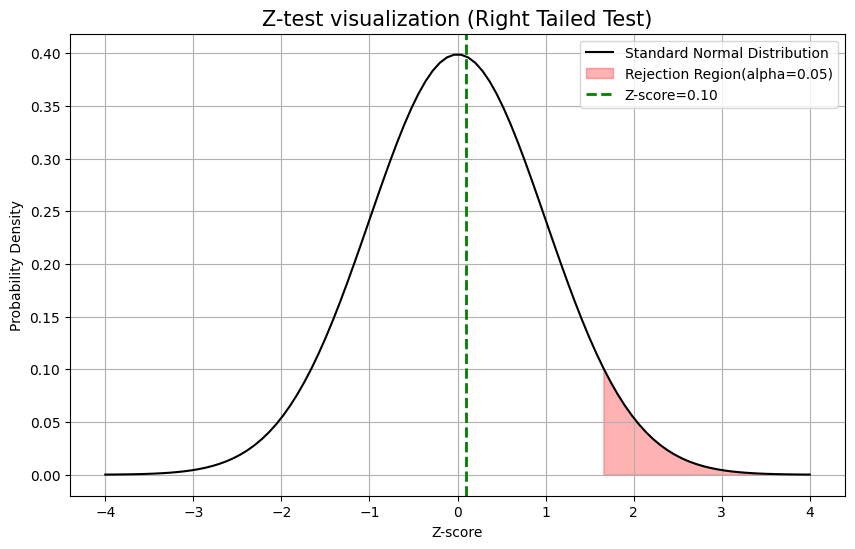

In [ ]:
#Visualizing the z-test as per the scenario i.e one tailed test
#In our case as the Z_score <1.645 it failed to reject the null hypothesis i.e it indicates that there is no significant increase
#here it is right tailed test due to z_score is less than 1.645
z_score=(cyclone_sample_mean-historical_mean)/(population_std/np.sqrt(n))
z_critical=1.645 #given in the question the alpha i.e significance is 0.05
#x-axis here this start and stop range which generate 1000 points between -4 and 4
x=np.linspace(-4,4,100)
#y-axis
y=stats.norm.pdf(x,0,1)
#plot the standard normal distribution
plt.figure(figsize=(10,6))
plt.plot(x,y,color='black',label='Standard Normal Distribution')
#give color to the right tailed region i.e shade it
plt.fill_between(x,0,y,where=(x>z_critical),color='red',alpha=0.3,label='Rejection Region(alpha=0.05)')
#plot the z_score as vertical line
plt.axvline(x=z_score,color='green',linestyle='--',linewidth=2,label=f'Z-score={z_score:.2f}')
#plot the graph
plt.title('Z-test visualization (Right Tailed Test)', fontsize=15)
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



